In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the Data
df = pd.read_csv("loan_approval_dirty_dataset.csv")
df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1.0,2.0,Graduate,No,9600000.0,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2.0,0.0,Not Graduate,Yes,4100000.0,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3.0,3.0,Graduate,No,9100000.0,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4.0,3.0,Graduate,No,8200000.0,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5.0,5.0,Not Graduate,Yes,9800000.0,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
df.shape

(4274, 13)

In [ ]:
df.columns

Index(['loan_id', 'no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4274 entries, 0 to 4273
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loan_id                    4264 non-null   float64
 1   no_of_dependents           4264 non-null   float64
 2    education                 4264 non-null   object 
 3    self_employed             4264 non-null   object 
 4    income_annum              4264 non-null   float64
 5    loan_amount               4274 non-null   int64  
 6    loan_term                 4274 non-null   int64  
 7    cibil_score               4274 non-null   int64  
 8    residential_assets_value  4274 non-null   int64  
 9    commercial_assets_value   4274 non-null   int64  
 10   luxury_assets_value       4274 non-null   int64  
 11   bank_asset_value          4274 non-null   int64  
 12   loan_status               4274 non-null   object 
dtypes: float64(3), int64(7), object(3)
memory usage:

In [ ]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4264.000000,4264.000000,4.264000e+03,4.274000e+03,4274.000000,4274.000000,4.274000e+03,4.274000e+03,4.274000e+03,4.274000e+03
mean,2181.860460,2.542448,5.054644e+06,1.513706e+07,10.902199,599.893308,7.472555e+06,4.979247e+06,1.513182e+07,4.979808e+06
std,2238.771339,2.707333,2.804856e+06,9.039549e+06,5.708110,172.378554,6.500615e+06,4.391887e+06,9.101394e+06,3.249742e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1069.750000,1.000000,2.600000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.325000e+06
50%,2132.500000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3203.250000,4.000000,7.500000e+06,2.150000e+07,16.000000,747.750000,1.130000e+07,7.675000e+06,2.170000e+07,7.100000e+06
max,83760.000000,100.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [ ]:
# Check Missing Values
df.isnull().sum()


,0
loan_id,10
no_of_dependents,10
education,10
self_employed,10
income_annum,10
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [ ]:
num_cols = df.select_dtypes(include=['number']).columns

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)


/tmp/ipython-input-3822849075.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


/tmp/ipython-input-3086599729.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
# Remove Duplicate Rows
df.duplicated().sum()


np.int64(5)

In [ ]:
df = df.drop_duplicates()


In [ ]:
df.duplicated().sum()


np.int64(0)

In [ ]:
# check datatypes
df.dtypes


,0
loan_id,float64
no_of_dependents,float64
education,object
self_employed,object
income_annum,float64
loan_amount,int64
loan_term,int64
cibil_score,int64
residential_assets_value,int64
commercial_assets_value,int64


In [ ]:
#Removve extra spaces
for col in cat_cols:
    df[col] = df[col].str.strip()


In [ ]:
for col in cat_cols:
    df[col] = df[col].str.lower()


In [ ]:
df.columns

Index(['loan_id', 'no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.strip()


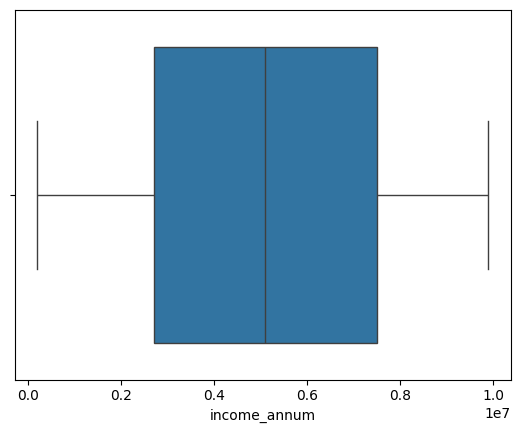

In [ ]:
# Detect & Handle Outliers.
sns.boxplot(x=df['income_annum'])
plt.show()


In [ ]:
Q1 = df['income_annum'].quantile(0.25)
Q3 = df['income_annum'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['income_annum'] < lower) | (df['income_annum'] > upper)]

print("Number of outliers:", outliers.shape[0])


Number of outliers: 0


In [ ]:
# Final Verification
df.isnull().sum()




,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [ ]:
df.duplicated().sum()


np.int64(0)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_id                   4269 non-null   float64
 1   no_of_dependents          4269 non-null   float64
 2   education                 4269 non-null   object 
 3   self_employed             4269 non-null   object 
 4   income_annum              4269 non-null   float64
 5   loan_amount               4269 non-null   int64  
 6   loan_term                 4269 non-null   int64  
 7   cibil_score               4269 non-null   int64  
 8   residential_assets_value  4269 non-null   int64  
 9   commercial_assets_value   4269 non-null   int64  
 10  luxury_assets_value       4269 non-null   int64  
 11  bank_asset_value          4269 non-null   int64  
 12  loan_status               4269 non-null   object 
dtypes: float64(3), int64(7), object(3)
memory usage: 466.9+ KB


In [ ]:
# Target Variable Analysis
df['loan_status'].value_counts()


,count
loan_status,
approved,2656
rejected,1613


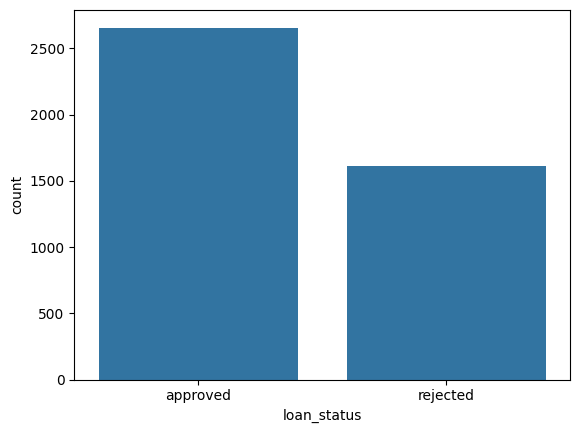

In [ ]:
sns.countplot(x='loan_status', data=df)
plt.show()




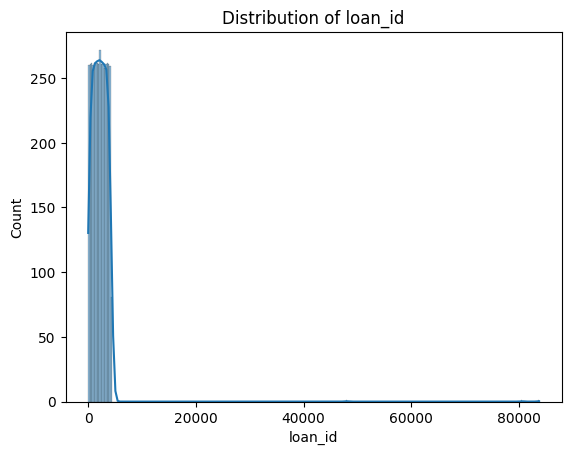

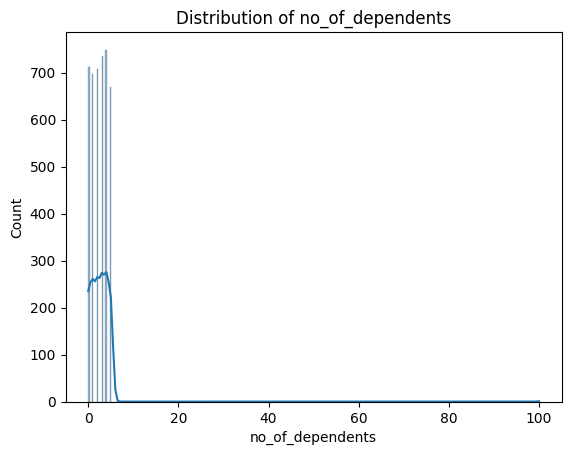

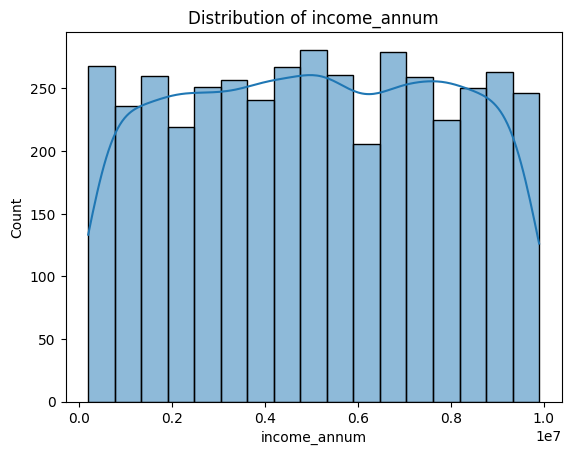

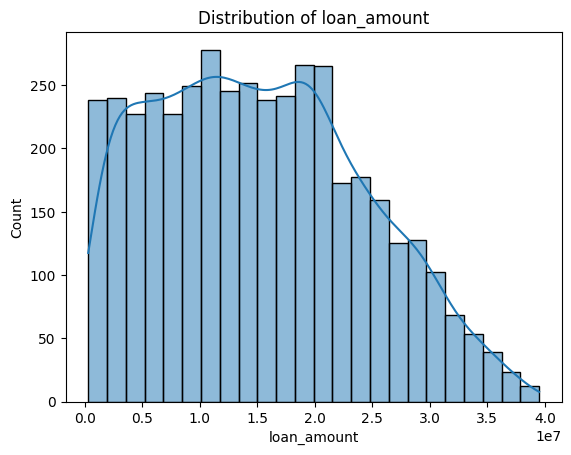

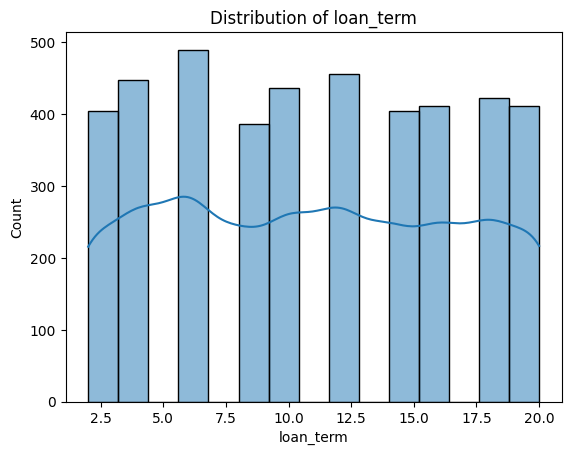

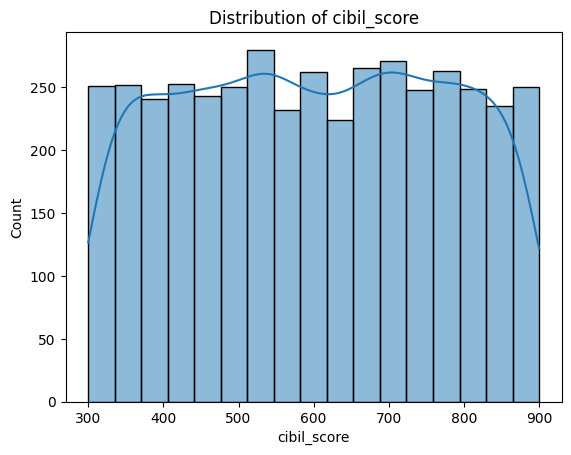

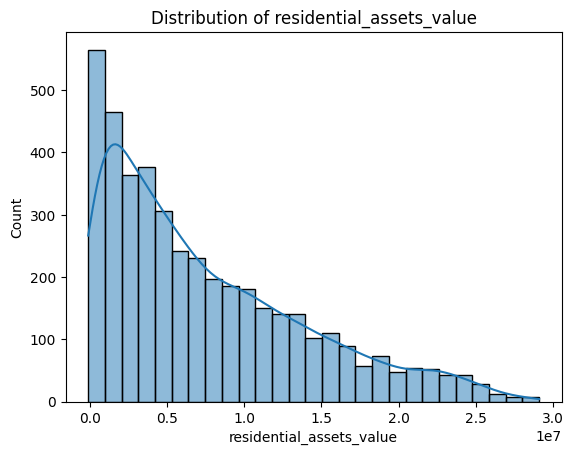

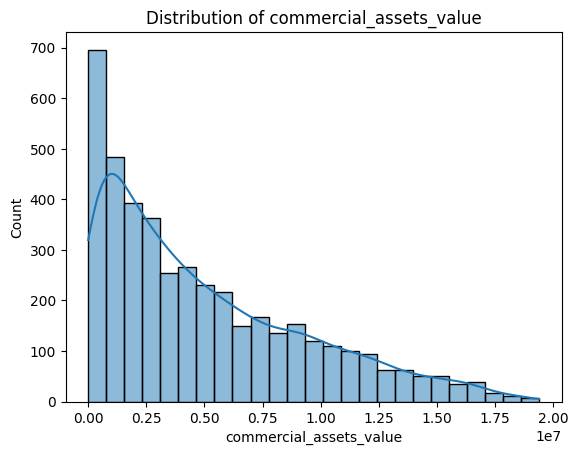

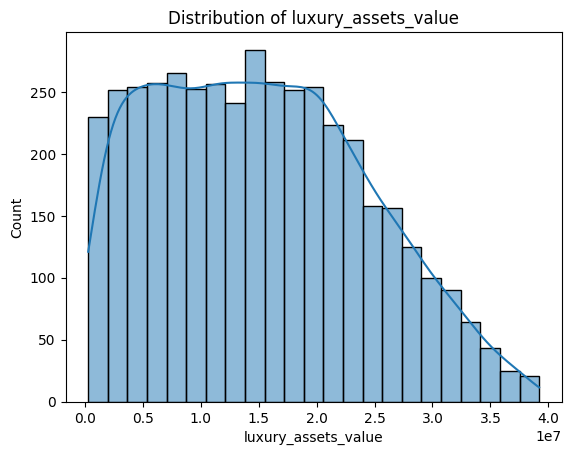

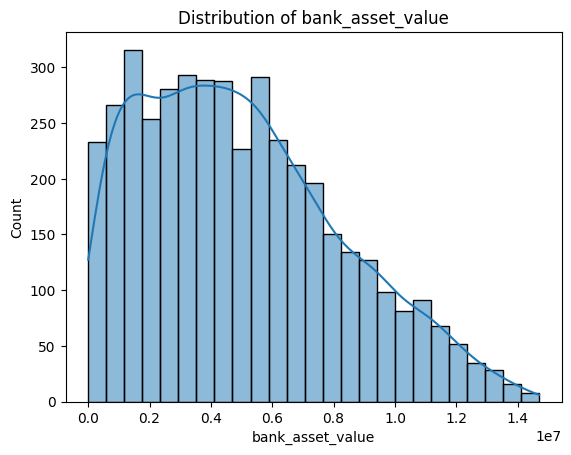

In [ ]:
# Univariate Analysis (Numerical).
num_cols = df.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


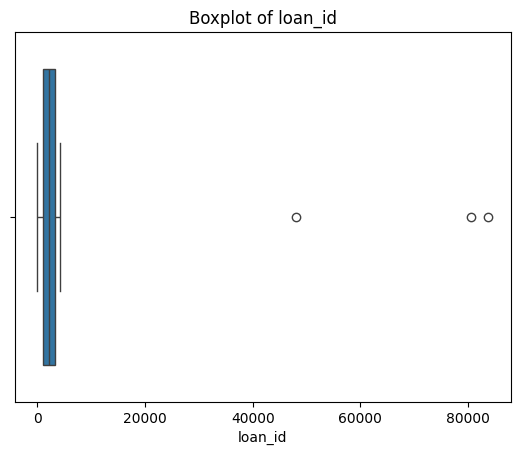

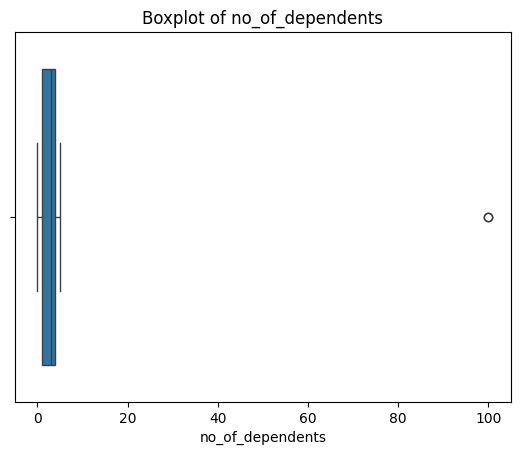

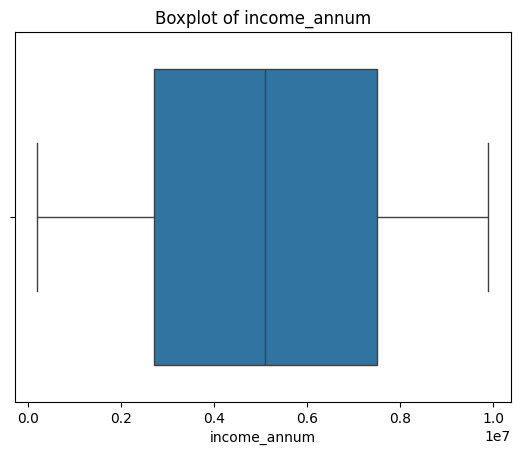

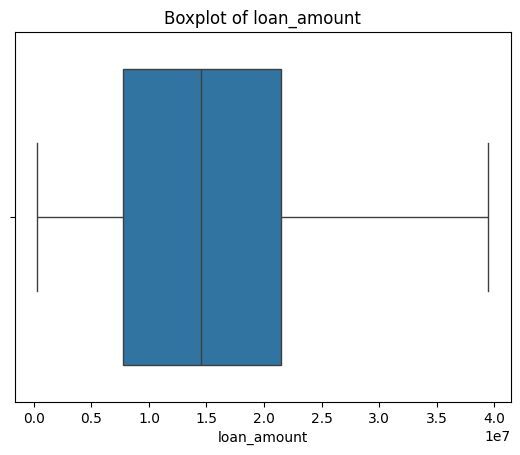

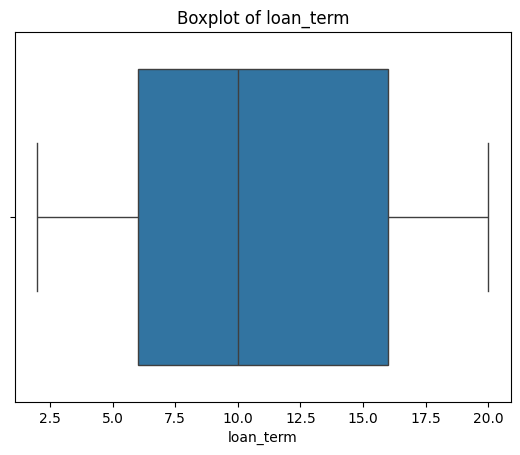

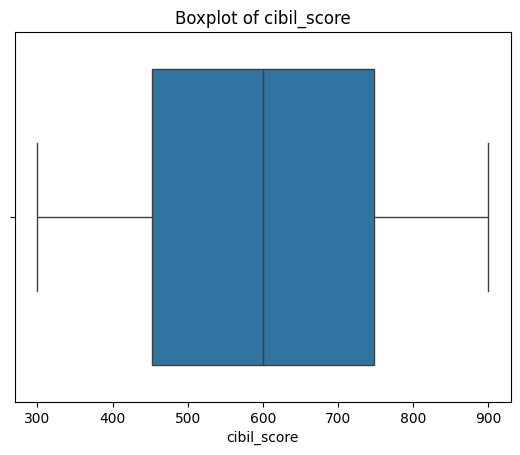

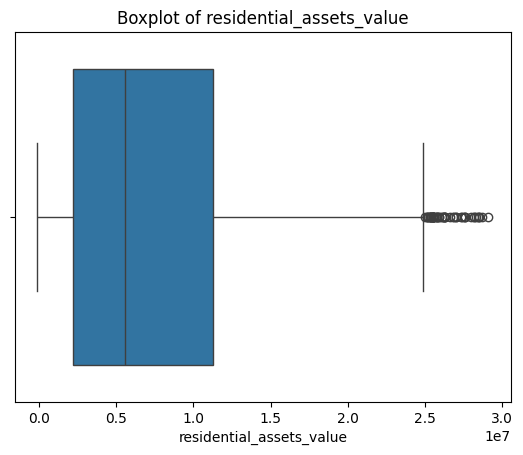

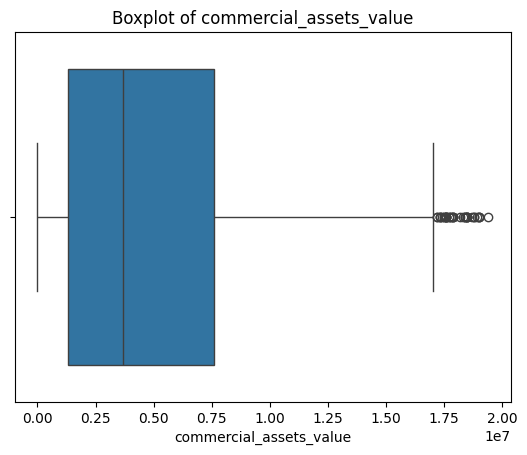

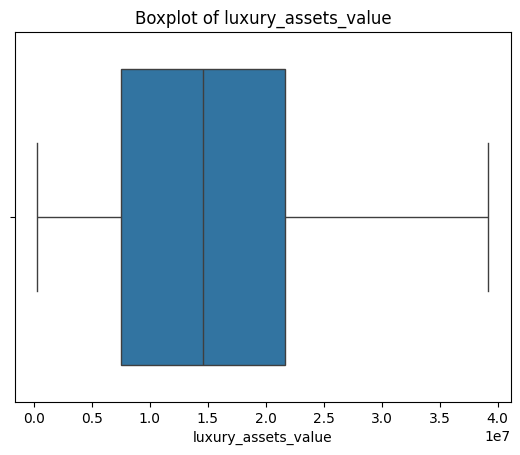

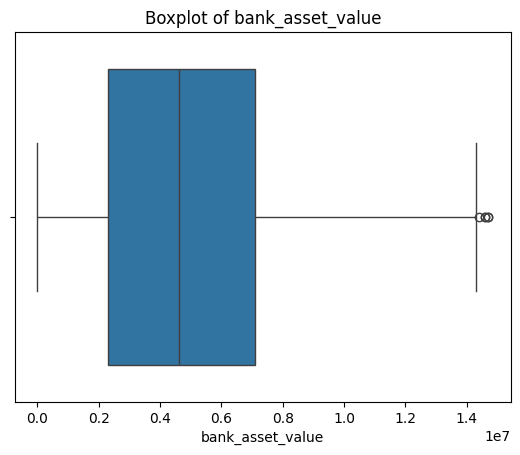

In [ ]:
# Outlier Detection
for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


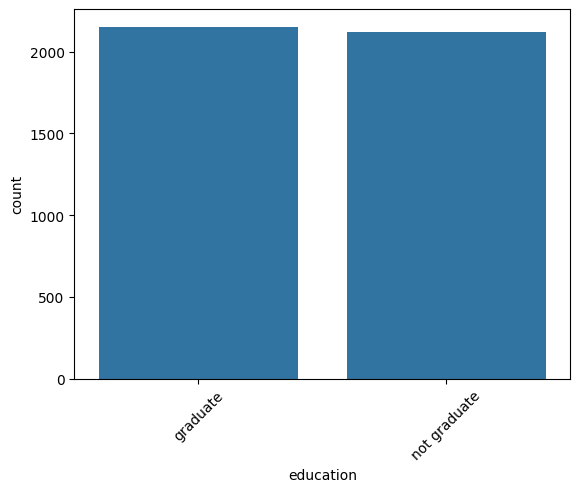

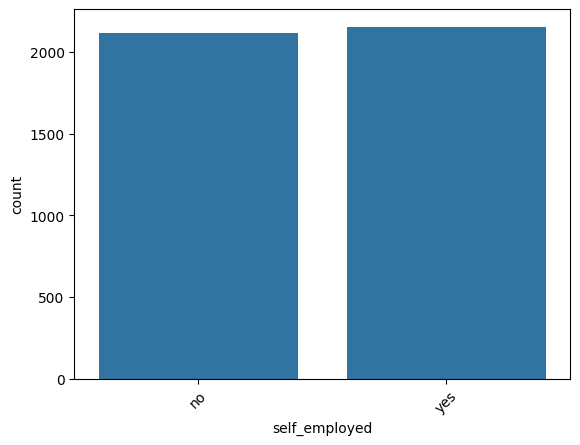

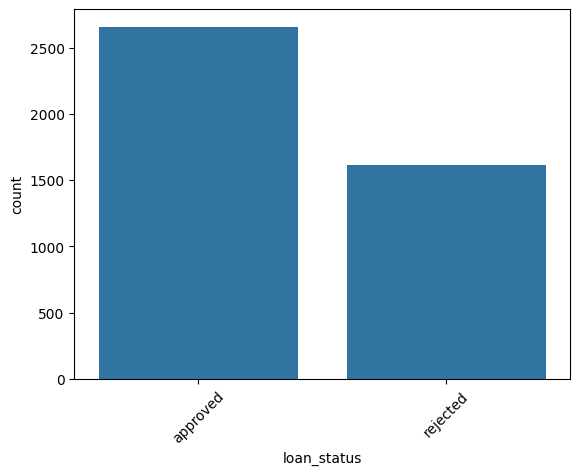

In [ ]:
# Categorical Analysis.
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure()
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=45)
    plt.show()


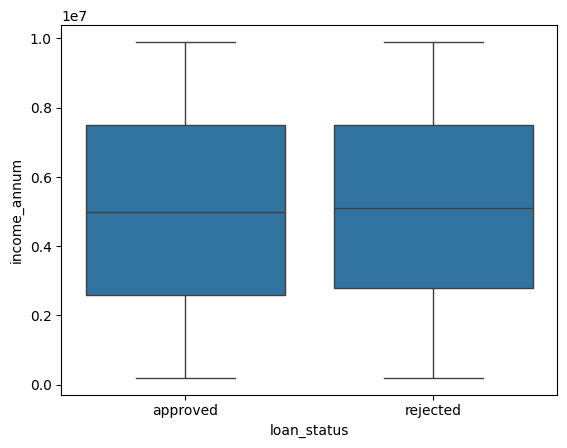

In [ ]:
# Bivariate Analysis.
# Income vs Loan Status
sns.boxplot(x='loan_status', y='income_annum', data=df)
plt.show()


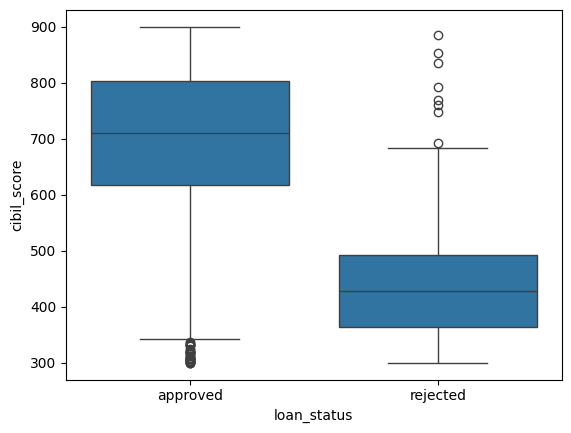

In [ ]:
# CIBIL Score vs Loan Status.
sns.boxplot(x='loan_status', y='cibil_score', data=df)
plt.show()


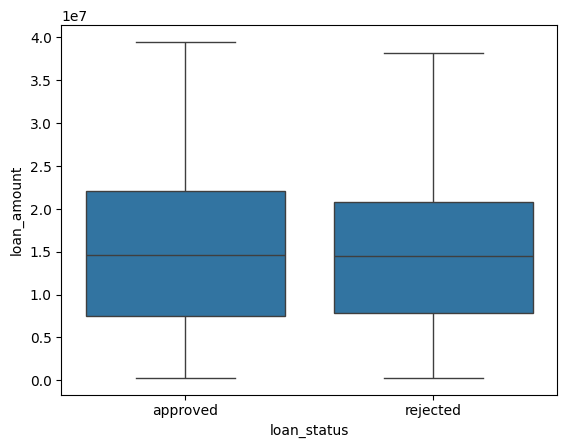

In [ ]:
# Loan Amount vs Loan Status.
sns.boxplot(x='loan_status', y='loan_amount', data=df)
plt.show()


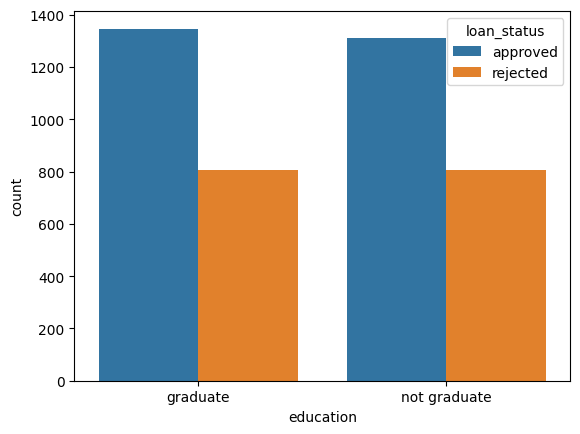

In [ ]:
# Education vs Loan Status.
sns.countplot(x='education', hue='loan_status', data=df)
plt.show()


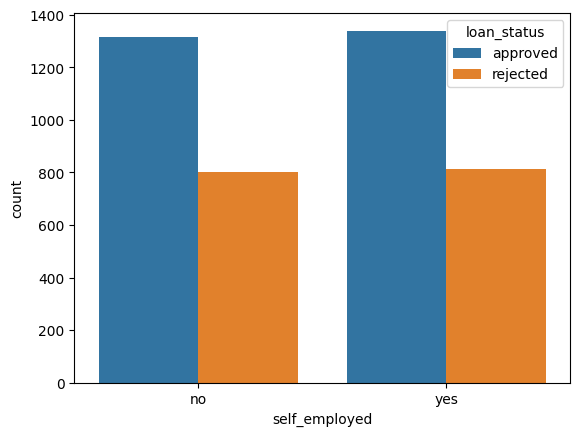

In [ ]:
# Self Employed vs Loan Status.
sns.countplot(x='self_employed', hue='loan_status', data=df)
plt.show()


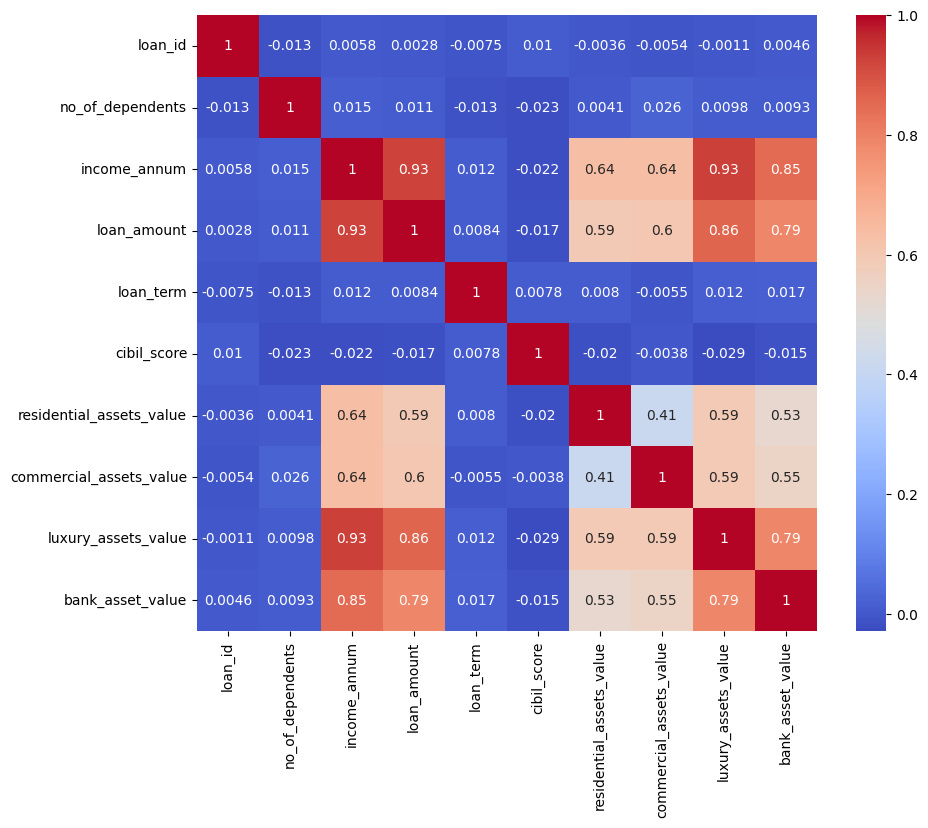

In [ ]:
# Correlation Matrix.
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()


In [ ]:
# Feature Engineering.
df['total_assets'] = (
    df['residential_assets_value'] +
    df['commercial_assets_value'] +
    df['luxury_assets_value'] +
    df['bank_asset_value']
)


In [ ]:
df.drop('loan_id', axis=1, inplace=True)


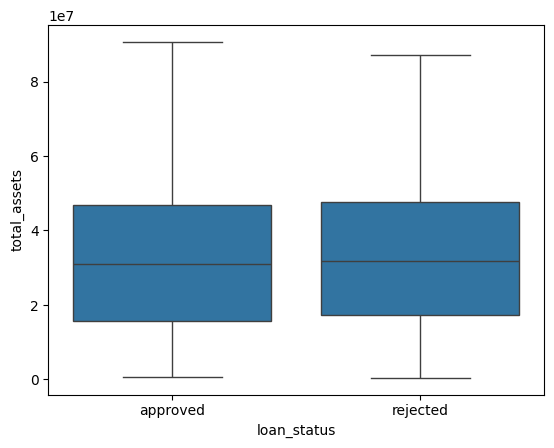

In [ ]:
sns.boxplot(x='loan_status', y='total_assets', data=df)
plt.show()


In [ ]:
# Encode Categorical Variables.
df = pd.get_dummies(df, drop_first=True)


In [ ]:
# Split Features & Target.
X = df.drop('loan_status_rejected', axis=1)
y = df['loan_status_rejected']



In [ ]:
# Train-Test Split.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
# Feature Scaling.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Model Building.

In [ ]:
# Model 1: Logistic Regression.
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression()

In [ ]:
# Model 2: Random Forest.
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
# Evaluation.
from sklearn.metrics import accuracy_score, classification_report

y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

print("Logistic Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Logistic Accuracy: 0.9063231850117096
Random Forest Accuracy: 0.9800936768149883


In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])


np.float64(0.9987034168778748)

In [ ]:
# Save Model.
import pickle

pickle.dump(rf, open("loan_model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))
